# Quantitative Finance with Python

### Alan Moreira, University of Rochester Simon Graduate School of Business

# Notebook 2


### Topics covered: 
* * *
* Introduction to  Data Analysis with pandas
* Series
* Data frames
* Renaming of cols/rows
* Reordering
* Handling missing data
* Slicing
* Choosing indexes
* Basic stats 
* Indexing
* Assigment
* Broadcasting
* Adding and Removing columns
* Visualization
* Sorting
* Grouping
* Concatenating
* Merging


###  PANDAS



Pandas is a package of efficient data analysis tools for Python

Its popularity has surged in recent years

Just as NumPy provides the basic array data type plus core array operations, pandas defines fundamental structures for working with data and endows them with methods that facilitate operations such as

- reading in data
- adjusting indices
- working with dates and time series
- sorting, grouping, re-ordering 
- dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages

This lecture will provide a basic introduction to pandas

Throughout the lecture we will assume that the following imports have taken place



In [1]:
import pandas as pd
import numpy as np

The idea behind `pandas`

* The most common data structure in `pandas` is the **DataFrame** much like the analogous data.frame in R.

```python
# Some toy data
a = np.arange(10)
b = np.sin(a)

# Place it into a dictionary
array_dict = {'a': a, 'b': b}

# Initialize a dataframe with toy data
df = pd.DataFrame(array_dict)
```

In [2]:
a = np.arange(10)
b = np.sin(a)

In [3]:
b

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [5]:
df = pd.DataFrame({'alan': a, 'bob': b})
df

,alan,bob
0,0,0.000000
1,1,0.841471
2,2,0.909297
3,3,0.141120
4,4,-0.756802
5,5,-0.958924
6,6,-0.279415
7,7,0.656987
8,8,0.989358
9,9,0.412118


* `pandas` provides higher level data manipulation tools than `numpy`, but is built on top of `numpy`.  Given the richness of capabilities with `pandas`, `pandas` operations are often slower than a similar operation with a `numpy` array.  However, it is not hard to convert from one to the other.
* The basic unit of the DataFrame in `pandas` is of the `Series` type.

In [6]:
df.head(3)

,alan,bob
0,0,0.000000
1,1,0.841471
2,2,0.909297


In [7]:
df.dtypes

alan      int32
bob     float64
dtype: object

In [9]:
# 2D numpy array
np_array = np.random.randint(1, 10, size = 16).reshape(4, 4)

np_array

array([[3, 2, 8, 2],
       [7, 4, 6, 2],
       [3, 3, 1, 2],
       [7, 7, 1, 6]])

In [10]:
# Convert to pd DataFrame
df = pd.DataFrame(np_array)

df

,0,1,2,3
0,3,2,8,2
1,7,4,6,2
2,3,3,1,2
3,7,7,1,6


In [11]:
# pandas DataFrame
A = pd.DataFrame(data = np_array, columns =['d','e','f','g'])

A

,d,e,f,g
0,3,2,8,2
1,7,4,6,2
2,3,3,1,2
3,7,7,1,6


In [12]:
# Convert to ndarray (TWO ways)

# first way
df.values # not a matrix, however, just numpy array

array([[3, 2, 8, 2],
       [7, 4, 6, 2],
       [3, 3, 1, 2],
       [7, 7, 1, 6]])

### Series

Two important data types defined by pandas are Series and DataFrame

You can think of a Series as a “column” of data, such as a collection of observations on a single variable

A DataFrame is an object for storing related columns of data

Let’s start with Series

<b>Properties of the `Series` object</b>
* alignment of data and label are intrinsic
* is a 1D array (actually just a `numpy` array with and index)
* slicing also slices the index
* can be initialized with a scalar, a dict or an ndarray (aka numpy array)
* if initialized with numpy array and an index is given, length must match data
* numpy functions can take a Series as input

<b>Examples of initializing a `Series`:</b>

In [13]:
# With a scalar only
a = pd.Series(5)
print('a:\n', a)

# With a scalar and index
b = pd.Series(5, index = ['Z'])
print('b:\n', b)

# With a scalar and index
c = pd.Series(5, index = ['X', 'Y', 'Z'])
print('c:\n', c)

# With a dict
d = pd.Series({'A': 1, 'B': 2})
print('d:\n', d)

# dict.  if index given, labels must match, but can add more
e = pd.Series({'A': 1, 'B': 2}, index = ['A', 'B', 'C'])
print('e:\n', e)

# With an ndarray
f = pd.Series(np.random.randn(5))
print('f:\n', f)

# With an ndarray and index (lengths must match)
g = pd.Series(np.random.randn(5), index = ['M', 'N', 'O', 'P', 'Q'])
print('g:\n', g)

a:
 0    5
dtype: int64
b:
 Z    5
dtype: int64
c:
 X    5
Y    5
Z    5
dtype: int64
d:
 A    1
B    2
dtype: int64
e:
 A    1.0
B    2.0
C    NaN
dtype: float64
f:
 0    0.784324
1   -0.613360
2    0.165631
3   -0.350544
4   -2.193200
dtype: float64
g:
 M    0.803993
N    0.429211
O    1.416376
P   -0.136035
Q   -2.736253
dtype: float64


In [14]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.099423
1    0.636529
2    0.407970
3    0.558391
Name: daily returns, dtype: float64

Here you can imagine the indices 0, 1, 2, 3 as indexing four listed companies, and the values being daily returns on their shares

Pandas Series are built on top of NumPy arrays, and support many similar operations

For example

In [15]:
np.exp(s)

0    1.104533
1    1.889909
2    1.503763
3    1.747857
Name: daily returns, dtype: float64

But Series provide more than NumPy arrays

Not only do they have some additional (statistically oriented) methods

In [16]:
s.describe()

count    4.000000
mean     0.425578
std      0.237225
min      0.099423
25%      0.330834
50%      0.483180
75%      0.577925
max      0.636529
Name: daily returns, dtype: float64

But their indices are very flexible

In [17]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [18]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.099423
AAPL    0.636529
MSFT    0.407970
GOOG    0.558391
Name: daily returns, dtype: float64

Viewed in this way, Series are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the same type—in this case, floats)

In fact, you can use much of the same syntax as Python dictionaries

In [19]:
s['AAPL']

0.6365288276395337

In [20]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.636529
MSFT    0.407970
GOOG    0.558391
Name: daily returns, dtype: float64

In [22]:
'GM' in s

False

### DataFrames

While a Series is a single column of data, a DataFrame is several columns, one for each variable

In essence, a DataFrame in pandas is analogous to a (highly optimized) Excel spreadsheet, or as a structure for storing the 
X matrix in a linear regression

Let’s look at an example that reads data from the CSV file MonthlyFactors.csv

In [27]:
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
df= pd.read_csv(url,na_values=-99)

In [30]:
# What are the dimensions
print(df.shape)

# What are the column names
print(df.columns)

# What do the first few rows look like
df.head(10)

(647, 7)
Index(['Date', 'RF', 'MKT', 'USA30yearGovBond', 'EmergingMarkets', 'WorldxUSA',
       'WorldxUSAGovBond'],
      dtype='object')


,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
5,7/31/1963,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
6,8/31/1963,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715
7,9/30/1963,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526
8,10/31/1963,0.0029,0.0282,-0.005193,0.038818,-0.001617,0.001675
9,11/30/1963,0.0027,-0.0058,-0.003419,-0.020225,-0.005580,0.000021


In [31]:
#Last 3 observations
df.tail(3)

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
644,10/31/2016,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
645,11/30/2016,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
646,12/31/2016,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 7 columns):
Date                647 non-null object
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: float64(6), object(1)
memory usage: 35.5+ KB


In [33]:
df.describe()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,0.003911,0.009052,0.006434,0.010835,0.008060,0.005964
std,0.002635,0.044003,0.035013,0.059528,0.046634,0.020171
min,0.000000,-0.226400,-0.145279,-0.289140,-0.201736,-0.059339
25%,0.002300,-0.017350,-0.013484,-0.019849,-0.017200,-0.004513
50%,0.004000,0.012200,0.004451,0.011562,0.008215,0.004909
75%,0.005250,0.038350,0.026080,0.043677,0.035035,0.016737
max,0.013500,0.166100,0.169476,0.261974,0.178742,0.095667


In [42]:
# you an also save the file locally and simply point pandas to the local address
# in this case in my computer:
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
df = pd.read_csv(url)
# note that you have to use "/"  instead of "\"
# This does NOT work

#url="C:\Users\Alan Moreira\Dropbox\Public\Fin418_2018\Data\GlobalFinMonthly.csv"

In [43]:
df.head()

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


To read an excel file, ensure you have the <b>`xlrd`</b> package installed (`pandas` method `read_excel` needs it): `conda install xlrd`.

With `pandas` and `xlrd` one can read an excel file by simply:

```python
# Reading from an excel file with read_excel
data = pd.read_excel(url)
```

In [46]:
url="C:/Users/Alan Moreira/Dropbox/Public/Fin418/Data/MonthlyFactorInputs.xlsx"
df = pd.read_excel(url,na_values=-99)

In [48]:
df.head()

,Calendar,Year,Month,Mkt-RF,SMB,HML,RF,Mom,RMW,CMA,BAB,STRev,LTRev,Bond10yr,Bond1yr
0,192607,1926,7,2.96,-2.30,-2.87,0.22,NaN,NaN,NaN,NaN,-1.84,NaN,NaN,NaN
1,192608,1926,8,2.64,-1.40,4.19,0.25,NaN,NaN,NaN,NaN,1.41,NaN,NaN,NaN
2,192609,1926,9,0.36,-1.32,0.01,0.23,NaN,NaN,NaN,NaN,-0.18,NaN,NaN,NaN
3,192610,1926,10,-3.24,0.04,0.51,0.32,NaN,NaN,NaN,NaN,-2.03,NaN,NaN,NaN
4,192611,1926,11,2.53,-0.20,-0.35,0.31,NaN,NaN,NaN,NaN,0.97,NaN,NaN,NaN


### Renaming row and column names

Initialize a `pandas` dataframe with toy data:

In [52]:
# Note here we are initializing a dataframe with a dict of 1D ndarrays (numpy arrays)
df = pd.DataFrame({'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

df.head()

,data1,data2
0,0.791785,1.418064
1,0.492502,0.601154
2,-0.956303,-0.840791
3,-0.587292,-1.399705
4,-0.681620,0.710911


Rename columns (with <b>`columns`</b> keyword) and rows (with <b>`index`</b> keyword) inplace (note: we could have specified `columns` when initializing the DataFrame):

In [53]:
df.rename(index = {0: 'a', 
                   1: 'b',
                   2: 'c',
                   3: 'd',
                   4: 'e'}, 
          columns = {'data1': 'one', 'data2': 'two'}, inplace = True)
df.head()

,one,two
a,0.791785,1.418064
b,0.492502,0.601154
c,-0.956303,-0.840791
d,-0.587292,-1.399705
e,-0.681620,0.710911


### Reordering of things

Using the toy dataframe from above, we shall now reorder the <b>rows</b>:

In [54]:
df2 = pd.DataFrame(df, index = ['b', 'c', 'd', 'a', 'e'])
df2.head()

,one,two
b,0.492502,0.601154
c,-0.956303,-0.840791
d,-0.587292,-1.399705
a,0.791785,1.418064
e,-0.681620,0.710911


In [ ]:
# How would you modify the above cell to do the same reordering,
#   but at the same time, remove one, say the one labeled 'e'



There's another way (same result, but does not modify object, `df`, inplace):

In [58]:
df.reindex?

In [60]:
# This does NOT change df
df.reindex(['b', 'c', 'd', 'a', 'e']) # compare to df2 above
df

,one,two
b,0.492502,0.601154
c,-0.956303,-0.840791
d,-0.587292,-1.399705
a,0.791785,1.418064
e,-0.681620,0.710911


### Missing data

Initialize `pandas` dataframe with some <b>`Series`</b> objects:

In [62]:
# Initialize a dataframe with a dict of pandas Series

df = pd.DataFrame({'weight' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'age' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'height' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

# Notice the introduction of NaNs (why did this happen?)

df

,weight,age,height
a,0.740075,1.162836,NaN
b,-0.589432,0.160586,-0.364570
c,0.472083,1.158931,-0.816381
d,NaN,-0.266408,0.783723


In [65]:
# Where are the NaNs?
pd.isnull(df)

,weight,age,height
a,False,False,True
b,False,False,False
c,False,False,False
d,True,False,False


In [66]:
# Replace NaN with a scalar
df2 = df.fillna(0)
df2

,weight,age,height
a,0.740075,1.162836,0.000000
b,-0.589432,0.160586,-0.364570
c,0.472083,1.158931,-0.816381
d,0.000000,-0.266408,0.783723


In [68]:
# Drop any row with NA/NaN
# how = 'all' will drop only rows with ALL nan
df2 = df.dropna(how = 'all')
df2

,weight,age,height
a,0.740075,1.162836,NaN
b,-0.589432,0.160586,-0.364570
c,0.472083,1.158931,-0.816381
d,NaN,-0.266408,0.783723


In [69]:
# Only look in column 'one' for NaNs and drop a row if any
df2 = df.dropna(subset = ['height'])
df2

,weight,age,height
b,-0.589432,0.160586,-0.364570
c,0.472083,1.158931,-0.816381
d,NaN,-0.266408,0.783723


EXERCISE  
```python 
alldates = pd.date_range('09-01-2013', '09-10-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
```

* expand to include "missing dates" in `alldates` but not `s`
* set missing dates to 0

In [70]:
# solution

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})

s.index

Index(['09-02-2013', '09-03-2013', '09-06-2013', '09-07-2013'], dtype='object')

In [72]:
s.index=pd.to_datetime(s.index)
s.index

DatetimeIndex(['2013-09-02', '2013-09-03', '2013-09-06', '2013-09-07'], dtype='datetime64[ns]', freq=None)

In [73]:

alldates = pd.date_range('09-01-2013', '09-10-2013')

In [74]:
alldates

DatetimeIndex(['2013-09-01', '2013-09-02', '2013-09-03', '2013-09-04',
               '2013-09-05', '2013-09-06', '2013-09-07', '2013-09-08',
               '2013-09-09', '2013-09-10'],
              dtype='datetime64[ns]', freq='D')

In [75]:
s=pd.Series(s,index=alldates)

s

2013-09-01     NaN
2013-09-02     2.0
2013-09-03    10.0
2013-09-04     NaN
2013-09-05     NaN
2013-09-06     5.0
2013-09-07     1.0
2013-09-08     NaN
2013-09-09     NaN
2013-09-10     NaN
Freq: D, dtype: float64

In [ ]:
s=s.fillna(0)
s

### Slicing

In [76]:
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data= pd.read_csv(url,na_values=-99)



We can select particular SET of rows using standard Python array slicing notation 

In [77]:
Data.head()

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [79]:
# slice "rows 1 to 7" which really are rows 2 to 8
Data[5:8]


,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
5,7/31/1963,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
6,8/31/1963,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715
7,9/30/1963,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [88]:
Data[['MKT','RF']].head()

,MKT,RF
0,-0.0215,0.0023
1,0.0331,0.0023
2,0.0476,0.0025
3,0.0200,0.0024
4,-0.0177,0.0023


To select both rows and columns using integers, the iloc attribute should be used with the format .iloc[rows,columns]

In [94]:
Data.iloc[[7,10,150],[5,6]]

,WorldxUSA,WorldxUSAGovBond
7,0.002432,0.004526
10,-0.008779,0.000738
150,-0.001332,-0.000276


To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a similar way


In [98]:
Data.loc[[2,4,5],['MKT', 'RF']]

,MKT,RF
2,0.0476,0.0025
4,-0.0177,0.0023
5,-0.0012,0.0027


Let’s imagine that we’re only interested in the Market and the risk-free rate

One way to strip the data frame Data down to only these variables is to overwrite the dataframe using the selection method described above

In [108]:
df=Data.copy()

In [109]:
df.iloc[0,1]=0.2

In [110]:
Data

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
5,7/31/1963,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
6,8/31/1963,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715
7,9/30/1963,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526
8,10/31/1963,0.0029,0.0282,-0.005193,0.038818,-0.001617,0.001675
9,11/30/1963,0.0027,-0.0058,-0.003419,-0.020225,-0.005580,0.000021


In [100]:
df=Data.copy()

In [101]:
df.head()

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [102]:
df = df[['Date','MKT','RF']]
df.tail()
#Note that the other columns were "deleted" as the new dataframe overwrote the old one

,Date,MKT,RF
642,8/31/2016,0.0052,0.0002
643,9/30/2016,0.0027,0.0002
644,10/31/2016,-0.0200,0.0002
645,11/30/2016,0.0487,0.0001
646,12/31/2016,0.0185,0.0003


EXERCISE: Slicing rows and columns by index<br>

Using this dataframe, 
```python
dates = pd.date_range('19740101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
```
Do the following:<br>
1.  Slice out the first row by index
*  Slice out the first column by index
*  Slice out the first and last row, first and last column, by index

In [111]:
dates = pd.date_range('19740101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [112]:
df

,A,B,C,D
1974-01-01,0.623633,0.043193,0.562075,0.691658
1974-01-02,0.001678,-1.131860,1.555222,1.232145
1974-01-03,0.157701,-1.484242,1.046728,1.122526
1974-01-04,1.063522,0.218634,-2.804954,0.736643
1974-01-05,0.937799,-0.536126,-0.197531,-0.367189
1974-01-06,0.441843,-0.355907,2.137809,1.450641


In [130]:
df.iloc[[-1],[0,-2]]

,A,C
1974-01-06,0.441843,2.137809


### Choosing your data identity: indexes

Here the index 0, 1,..., 7 is redundant, because we can use the date as an index

To do this, we will tell pandas when we load that the first column is the index and also tell panda that is a date

You can do this at the time that you load with commands like that 

Data = pd.read_csv(url,index_col=0, parse_dates=True,na_values=-99)

or after like that:

In [131]:
Data.head()

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [133]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 7 columns):
Date                647 non-null object
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: float64(6), object(1)
memory usage: 35.5+ KB


In [134]:
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an inde


Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 7 columns):
Date                647 non-null datetime64[ns]
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 35.5 KB


In [137]:
Data=Data.set_index(['Date'])

In [138]:
Data.head(5)

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [141]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: float64(6)
memory usage: 35.4 KB


We now can do stuff like this


In [146]:
Data.loc['2007-01-31',:]

RF                  0.004400
MKT                 0.018400
USA30yearGovBond   -0.014516
EmergingMarkets    -0.010341
WorldxUSA           0.006843
WorldxUSAGovBond   -0.016258
Name: 2007-01-31 00:00:00, dtype: float64

In [ ]:
Data['2007':'2010']

What we cannot do using the [] notation is to select one single date or a non-continuous slice of dates. 

For that we need the .loc method

In [ ]:
Data.loc['2010-12-31']

No note that any manipulation  will automatically carry the dates. So the indentity of the observation is never lost

In [149]:
Data.loc['2010', ['MKT', 'RF']]

,MKT,RF
Date,,
2010-01-31,-0.0336,0.0000
2010-02-28,0.0340,0.0000
2010-03-31,0.0632,0.0001
2010-04-30,0.0201,0.0001
2010-05-31,-0.0788,0.0001
2010-06-30,-0.0555,0.0001
2010-07-31,0.0694,0.0001
2010-08-31,-0.0476,0.0001
2010-09-30,0.0955,0.0001


Note that it si not always the case that dates are the correct indentity for your data set.

The index should be thought as an id that uniquely identifies an observation.

If your data set is time-series at the daily frequency days will do

If your data set has time-series but for multiple firms, then one particular date will have multiple observations associated with it and therefore date is not a good idetity in this case

Toward the end of the course we will work with data sets at the firm level that require multi-index, but for now date will be the appropriety identity



### Observation about working with data

- Look at your data
- plot you data
- always check units are correct
- returns should be in %, for example the annual risk-free rate in 2016 was number very close to zero. We can check if that is correct
 - Wealth_tomorrow=Wealth_today*(1+return)
 - if the data is not getting in correctly, nothing that you do after will be right

In [157]:
(Data['2006':'2008']+1).cumprod()-1

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
2006-01-31,0.003500,0.033900,-0.024433,0.112300,0.061468,0.018000
2006-02-28,0.006912,0.034314,0.007681,0.111241,0.059293,0.011270
2006-03-31,0.010637,0.053241,-0.048631,0.121198,0.094727,-0.001241
2006-04-30,0.014276,0.064722,-0.083483,0.201210,0.147819,0.029270
2006-05-31,0.018637,0.031290,-0.085098,0.075603,0.104624,0.053237
2006-06-30,0.022712,0.031805,-0.078338,0.073322,0.105029,0.038747
2006-07-31,0.026803,0.027884,-0.057285,0.089377,0.116094,0.045720
2006-08-31,0.031115,0.053068,-0.025193,0.117679,0.147087,0.054377
2006-09-30,0.035343,0.076762,-0.004321,0.127071,0.149084,0.051506


In [152]:
Data.mean()*12

RF                  0.046895
MKT                 0.108621
USA30yearGovBond    0.077209
EmergingMarkets     0.130017
WorldxUSA           0.096725
WorldxUSAGovBond    0.071566
dtype: float64

### Descriptive statistics on dataframes

In [153]:
# pandas 'describe' (like Rs summary function)
Data.describe()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,0.003908,0.009052,0.006434,0.010835,0.008060,0.005964
std,0.002639,0.044003,0.035013,0.059528,0.046634,0.020171
min,0.000000,-0.226400,-0.145279,-0.289140,-0.201736,-0.059339
25%,0.002300,-0.017350,-0.013484,-0.019849,-0.017200,-0.004513
50%,0.004000,0.012200,0.004451,0.011562,0.008215,0.004909
75%,0.005250,0.038350,0.026080,0.043677,0.035035,0.016737
max,0.013500,0.166100,0.169476,0.261974,0.178742,0.095667


In [158]:
# also any other stastical operation

Data.std()

RF                  0.002639
MKT                 0.044003
USA30yearGovBond    0.035013
EmergingMarkets     0.059528
WorldxUSA           0.046634
WorldxUSAGovBond    0.020171
dtype: float64

In [159]:
Data.mean()

RF                  0.003908
MKT                 0.009052
USA30yearGovBond    0.006434
EmergingMarkets     0.010835
WorldxUSA           0.008060
WorldxUSAGovBond    0.005964
dtype: float64

In [160]:
Data.max()

RF                  0.013500
MKT                 0.166100
USA30yearGovBond    0.169476
EmergingMarkets     0.261974
WorldxUSA           0.178742
WorldxUSAGovBond    0.095667
dtype: float64

### Boolean indexing
<table style="width:50%" align="left">
  <tr>
    <td><b>Operator/Method</b></td>
    <td><b>Meaning</b></td>		
  </tr>
    <tr>
    <td>`isnull`</td>
    <td>Returns a df of boolean values representing if the value is null</td>		
  </tr>
    <tr>
    <td>`isin`</td>
    <td>Returns rows where value is in a certain column</td>		
  </tr>
  <tr>
    <td>`|`</td>
    <td>or</td>		
  </tr>
  <tr>
    <td>`&`</td>
    <td>and</td>		
  </tr>
  <tr>
    <td>`~`</td>
    <td>not</td>		
  </tr>
</table>

In [166]:
(Data.MKT <- 0.10).shape

(647,)

In [167]:
# Use criteria to filter
Data.loc[:,[True,False,False,False,False,False]]

# Take note of where the NaNs appear

,RF
Date,
1963-02-28,0.0000
1963-03-31,0.0023
1963-04-30,0.0025
1963-05-31,0.0024
1963-06-30,0.0023
1963-07-31,0.0027
1963-08-31,0.0025
1963-09-30,0.0027
1963-10-31,0.0029


### Assignment

In [168]:
# Assign a whole row
df = Data.copy()
df.iloc[3] = 0
df.head(4)

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000


In [169]:
# Assign a whole column
df = Data.copy()
df['MKT'] = 0
df.head()


,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0000,0,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,0,0.001666,-0.055699,-0.011160,0.003139


In [170]:
# Using a criterion to fill in missing values by assignment
df = Data.copy()
df[Data.MKT<0] = 0
df.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000


### Broadcasting
* Broadcasting is essentially vectorizing array operations, usually arithmetic.  The term comes from the `numpy` package.  Here, it is applied to `pandas` dataframes.

<b>Scalar value broadcasting</b>

In [171]:
# Addition
(Data + 100).head()

# Try subtraction, multiplication and division on your own


,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,100.0000,99.9785,99.998122,100.098222,99.997227,100.003206
1963-03-31,100.0023,100.0331,100.003342,100.014149,100.000371,100.001913
1963-04-30,100.0025,100.0476,99.998157,99.852945,99.996664,100.008002
1963-05-31,100.0024,100.0200,99.998193,99.987828,99.999814,100.004689
1963-06-30,100.0023,99.9823,100.001666,99.944301,99.988840,100.003139


<b>Array broadcasting</b>

In [174]:
d =np.array([0.1, 0.5,0.4])

A=(Data[['RF','MKT','USA30yearGovBond']] * d)
A.head()
# Is the broadcast happening row-wise or column-wise?

# The array 'd' could also be numpy array or pandas series...try these


,RF,MKT,USA30yearGovBond
Date,,,
1963-02-28,0.00000,-0.01075,-0.000751
1963-03-31,0.00023,0.01655,0.001337
1963-04-30,0.00025,0.02380,-0.000737
1963-05-31,0.00024,0.01000,-0.000723
1963-06-30,0.00023,-0.00885,0.000667


In [181]:
# what do I get If I use the dol product instead?

# what is the interpretation of A?

Data['P']=(Data[['RF','MKT','USA30yearGovBond']] @ d)
Data

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond,P
Date,,,,,,,
1963-02-28,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206,-0.011501
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913,0.018117
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002,0.023313
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689,0.009517
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139,-0.007953
1963-07-31,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901,0.001030
1963-08-31,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715,0.029594
1963-09-30,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526,-0.005567
1963-10-31,0.0029,0.0282,-0.005193,0.038818,-0.001617,0.001675,0.012313


### Adding and removing columns

In [182]:
# Create a new column and add it to dataframe
Data['MKT_RF'] = Data['MKT'] - Data['RF']
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond,P,MKT_RF
Date,,,,,,,,
1963-02-28,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206,-0.011501,-0.0215
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913,0.018117,0.0308
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002,0.023313,0.0451
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689,0.009517,0.0176
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139,-0.007953,-0.0200


In [179]:
# Remove a column by label
Data.drop('P', axis = 'columns',inplace=True)

# Check to see if df was modified (if not how would we modify it inplace?)
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0000,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


### References
[The basics from pandas documentation]: http://pandas.pydata.org/pandas-docs/version/0.16.2/basics.html
[Pandas cheatsheet from Notebook Gallery]: http://nbviewer.ipython.org/github/pybokeh/jupyter_notebooks/blob/master/pandas/PandasCheatSheet.ipynb
1. [The basics from pandas documentation]
* [Pandas cheatsheet from Notebook Gallery]

### Visualization in Pandas

One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through Matplotlib

We jsut make sure we import matplotlib so we can see our plots


In [183]:

import matplotlib.pyplot as plt
%matplotlib inline

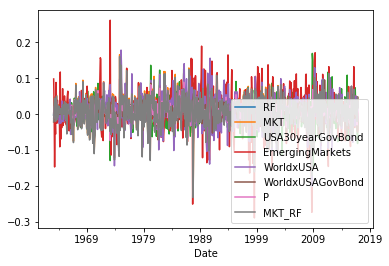

In [184]:



Data.plot()
plt.show()

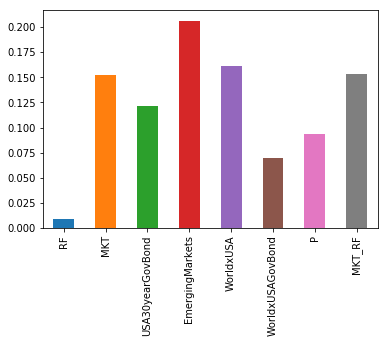

In [185]:
(Data.std()*12**0.5).plot(kind='bar')
plt.show()

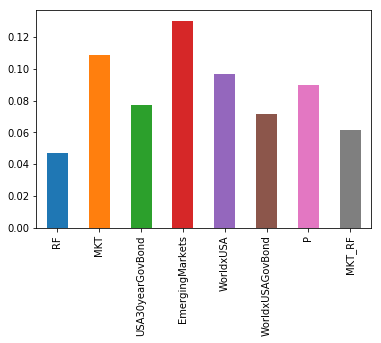

In [186]:
(Data.mean()*12).plot(kind='bar')
plt.show()

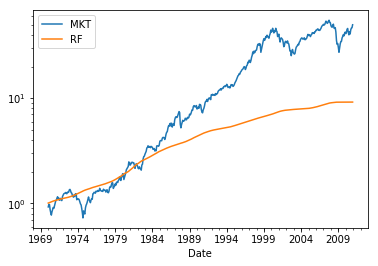

In [191]:
(Data['1970':'2010'][["MKT",'RF']]+1).cumprod().plot(logy=True)
plt.show()

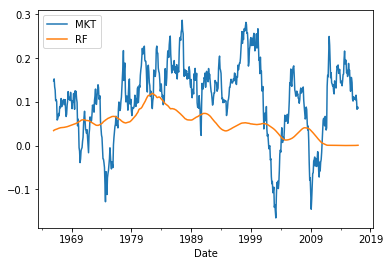

In [195]:
((Data[["MKT",'RF']]).rolling(36).mean()*12).plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C2BF6B8C18>]],
      dtype=object)

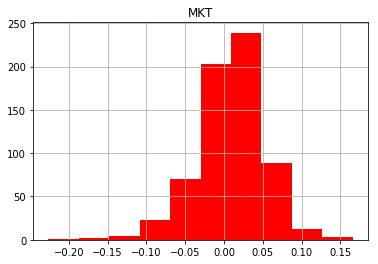

In [200]:
Data[['MKT']].hist(color='red')

In [ ]:
Data[['MKT']].hist

### Lecture 9/6 ended here

### Sorting

In [ ]:
# Here we pick the columns from the dataframe 
#   and sort first by 'letter', then by 'number'
Data.sort_values(by = ['MKT']).head()

# What happens if we switch the order of the values in the 'by' arg?  try this...


In [ ]:
Data.sort_values(by = ['MKT'],ascending=False).head()

All this below is new and needs to be worked on

###  Grouping
* Use to split, apply and combine

In [ ]:
from IPython.display import display_html

# Using this dataframe
df = pd.DataFrame({'letter': ['c', 'a', 'b', 'b','c', 'a', 'b', 'a','c'],
                   'number': [4, 3, 5, 2, 1, 7, 7, 5, 3]},
                 index = range(1, 10))

# Let's group by letter and get
grouped = df.groupby('letter')

# Now let's iterate through our groupby object
for name, stuff in grouped:
    print(name)
    display_html(stuff)

Now lets do something useful

In [ ]:
Data['year']=Data.index.year
Data.head()

In [ ]:
dg=Data.groupby('year')
dg

This data set not is organized by year, so I can do any operation that deals with data within the year

Examples:

- Compute the average return per year
- Compute the asset return realized volatility in a given year
- Compute the minimum/maximum return in a given year

In [ ]:
dg.std().plot()

In [ ]:
# note what is happening: For each year, pandas is getting the returns of a given asset computing the stndard deviation
# using returns for that year and recording as the quantity associated with that year
dg.std().head()

Groupby is super powerful and can apply any function to any particular group structure

Groupby is the key building block of creating a quantitative investment  strategy

Lets do something more sophisticated with groupby

In [ ]:
dg.apply(func)

In [ ]:

# An anonymous function checking whether returns were high or low
func = lambda x: 'bull market' if x.MKT.sum() > 0 else 'bear market'
# We then want to group by wheter a matricular year was a "bull market" or a " bear market" and 
#look at the stock market volatility during that year
# Apply our function to the dataframe
grouped = dg.std().groupby(dg.apply(func))

#  Print groups
for key, values in grouped:
    print(key)
    display_html(values)




In [ ]:
# or simply compare the average volatility across bull and bear markets   
grouped.mean()

EXERCISE :  Splitting up a dataframe's columns with `groupby`
<br><br>
Using the dataframe below,
```python
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3'],
                 'C': ['C0', 'C1', 'C2', 'C3'],
                 'D': ['D0', 'D1', 'D2', 'D3'],
                 'E': ['E0', 'E1', 'E2', 'E3']},
                 index = pd.date_range('1974-01-01', periods=4))
```
<br>
and this function
```python
func = lambda x: 'vowel' if x.lower() in 'aeiou' else 'consonant'
```
<br>
split the dataframe's columns and print the groups.  HINT:  check out the `groupby` help and use the `axis` argument.

### Concatenating


In [ ]:
#  I like this dataset because it is very easy on the eyes

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3'],
                 'C': ['C0', 'C1', 'C2', 'C3'],
                 'D': ['D0', 'D1', 'D2', 'D3']},
                index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                 'B': ['B8', 'B9', 'B10', 'B11'],
                 'C': ['C8', 'C9', 'C10', 'C11'],
                 'D': ['D8', 'D9', 'D10', 'D11']},
                index=[8, 9, 10, 11])


bigdf = pd.concat([df1, df2, df3], keys=['apples', 'oranges', 'carrots'])

# Two things happened here: stacked dataframes and added a new index column (of fruit)

# let's name our indices
bigdf.index.names = ['fruit', 'index']

bigdf

The additional indices above created what is called a <b>hierarchical index</b> or <b>`MultiIndex`</b> (create it different ways as shown [here](http://pandas.pydata.org/pandas-docs/stable/advanced.html#creating-a-multiindex-hierarchical-index-object)).  Just FYI, you can have a `MultiIndex` on the columns as well as rows (which could help with subsetting a dataframe in fancy ways).
<br><br>


In [ ]:
# now just the basic concatenation

bigdf = pd.concat(dfs)



bigdf

Now, we can slice out things in a couple of interesting ways...but first let's start with some different data for reasons to become clear.

In [ ]:
# This data has numerical indices
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3'],
                 'C': ['C0', 'C1', 'C2', 'C3'],
                 'D': ['D0', 'D1', 'D2', 'D3']},
                index=[1, 3, 7, 8])

# This data has lettered indices
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=['e', 'f', 'g', 'h'])

# let's concatenate these and create a hierarchical index with keys
bigdf = pd.concat([df1, df2], keys = ['coffee', 'tea'])

# Add labels to the indices

bigdf.index.names = ['outer', 'inner']

bigdf

### Comment on slicing vs selecting

<b>Selecting/indexing with `[], .loc,  and `.iloc`</b><br>
* This is a a bit tangential, yet really important and often confusing

<i>Selecting(/slicing/subscripting) is generally on the <b>values</b> or <b>label names</b> of the index for `[],  .loc` and always <b>positional</b> with `.iloc`</i>.  Slicing, however, is ALWAYS on values/labels with `[], .loc` (even if the label is an integer - often the confusion).<br>
<br>e.g. for the above MultiIndex, the first row has an 'outer' index label of 'coffee' and an inner label of '0'.  This first row also has the positional index of 0 for both the outer and inner index.

In [ ]:
# Label-based indexing with loc by the outer index ('coffee')
bigdf.loc['coffee']

In [ ]:
# Positional-based indexing with iloc on "0" - what is 0 here?
bigdf.iloc[0]

You may have noticed, we used labels in the case of `.loc` and a positional argument in the place of `.iloc`.  `.loc` would NOT have worked with a positional argument (even though "0" can technically be a label) as the first argument.  
```python
# Mix of label-based and positional-based indexing

bigdf.loc['tea', 1]
```

In [ ]:
bigdf.loc['tea', 'A']

### Concatenating on different axis

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3'],
                 'C': ['C0', 'C1', 'C2', 'C3'],
                 'D': ['D0', 'D1', 'D2', 'D3']},
                index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A1', 'A2', 'A3', 'A4'],
                    'B': ['B1', 'B2', 'B3', 'B4'],
                    'C': ['C1', 'C2', 'C3', 'C4'],
                    'D': ['D1', 'D2', 'D3', 'D4']},
                   index=[1, 2, 3, 4])

# Add axis arg to set axis upon which to concatenate
bigdf = pd.concat([df1, df2], axis = 1)
bigdf

<b>As it is apparent that `append` and `concat` do the same thing, the following table might help you choose one or the other.</b>

### Merging

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3'],
                 'C': ['C0', 'C1', 'C2', 'C3'],
                 'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'A': ['A1', 'A2', 'A3', 'A4'],
                    'E': ['E1', 'E2', 'E3', 'E4'],
                    'F': ['F1', 'F2', 'F3', 'F4']})

In [ ]:
pd.merge(df1, df2, on = 'A')

`merge` combines two dataframes with an `inner` join.  Modify the above code by adding the keyword/values:
```python
how = outer  
how = left 
how = right
```

inner means you only output entries that are present in both data frames "A" in the case above

outer means you output the union of both A B C D E F

left means you keep only the entries of df1 (the left frame)

rigth does the same for df2 (alternatively, you could have jsut flipped df1 and df2 for the same outcome)

### References
1. http://pandas.pydata.org/pandas-docs/version/0.16.2/groupby.html
* http://pandas.pydata.org/pandas-docs/version/0.16.2/basics.html#descriptive-statistics

### Disclaimer: Material for this note was collected from a variety of sources. In particular Python DS101 Microsoft Azure course on Python and Lectures on Python from Quantitative Economics